<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0501_a_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq as hq
import math

def a_star(G, s, t, h):
    n = len(G)
    g = [math.inf]*n
    visited = [False]*n
    f = [math.inf]*n
    path = [-1]*n

    g[s] = 0
    f[s] = h[s]
    q = []
    hq.heappush(q, (f[s], s))
    while q:
        _, n = hq.heappop(q)
        if not visited[n]:
            visited[n] = True
            if n == t:
                break
            for v, w in G[n]:
                if not visited[v] and g[n] + w < g[v]:
                    path[v] = n
                    g[v] = g[n] + w
                    f[v] = g[v] + h[v]
                    hq.heappush(q, (f[v], v))

    return path

In [31]:
import graphviz as gv

def drawGraph(G, path=[], h=[], directed=False):
    g = gv.Digraph("nombre") if directed else gv.Graph("nombre")
    n = len(G)

    for u, hi in enumerate(h):
        g.node(str(u), f"{u}({hi})")

    done = set()
    for v, u in enumerate(path):
        if u != -1:
            g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
            done.add((u, v))
            done.add((v, u))
    for u in range(n):
        g.node(str(u))
        for v, w in G[u]:
            if not (u, v) in done:
                done.add((u, v))
                done.add((v, u))
                g.edge(str(u), str(v), str(w))
    
    return g

In [32]:
def manhattan(a, b):
    x0, y0 = a
    x1, y1 = b
    return abs(x0 - x1) + abs(y0 - y1)

In [33]:
n = 6
G = [[] for i in range(n*n)]
end = (5, 5)
h = []
for i in range(n):
    for j in range(n):
        idx = i * n + j
        nbrs = [(i-1, j-1, 2), (i-1, j, 1), (i-1, j+1, 2),
                (  i, j-1, 1),              (  i, j+1, 1),
                (i+1, j-1, 2), (i+1, j, 1), (i+1, j+1, 2)]
        for i0, j0, w in nbrs:
            if (i0 < 0 or i0 >= n or j0 < 0 or j0 >= n):
                continue
            idx0 = i0 * n + j0
            G[idx].append((idx0, w))
        h.append(manhattan((i, j), end))

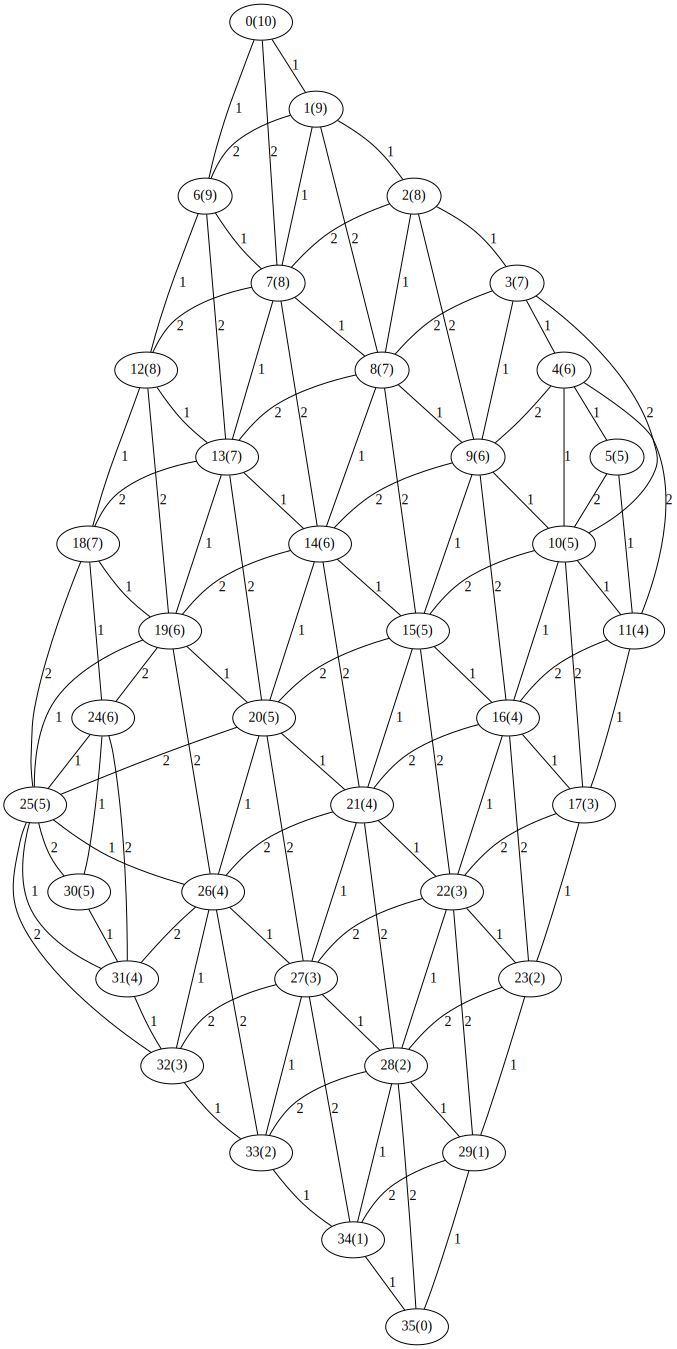

In [34]:
drawGraph(G, h=h)

In [35]:
path = a_star(G, 7, 35, h)

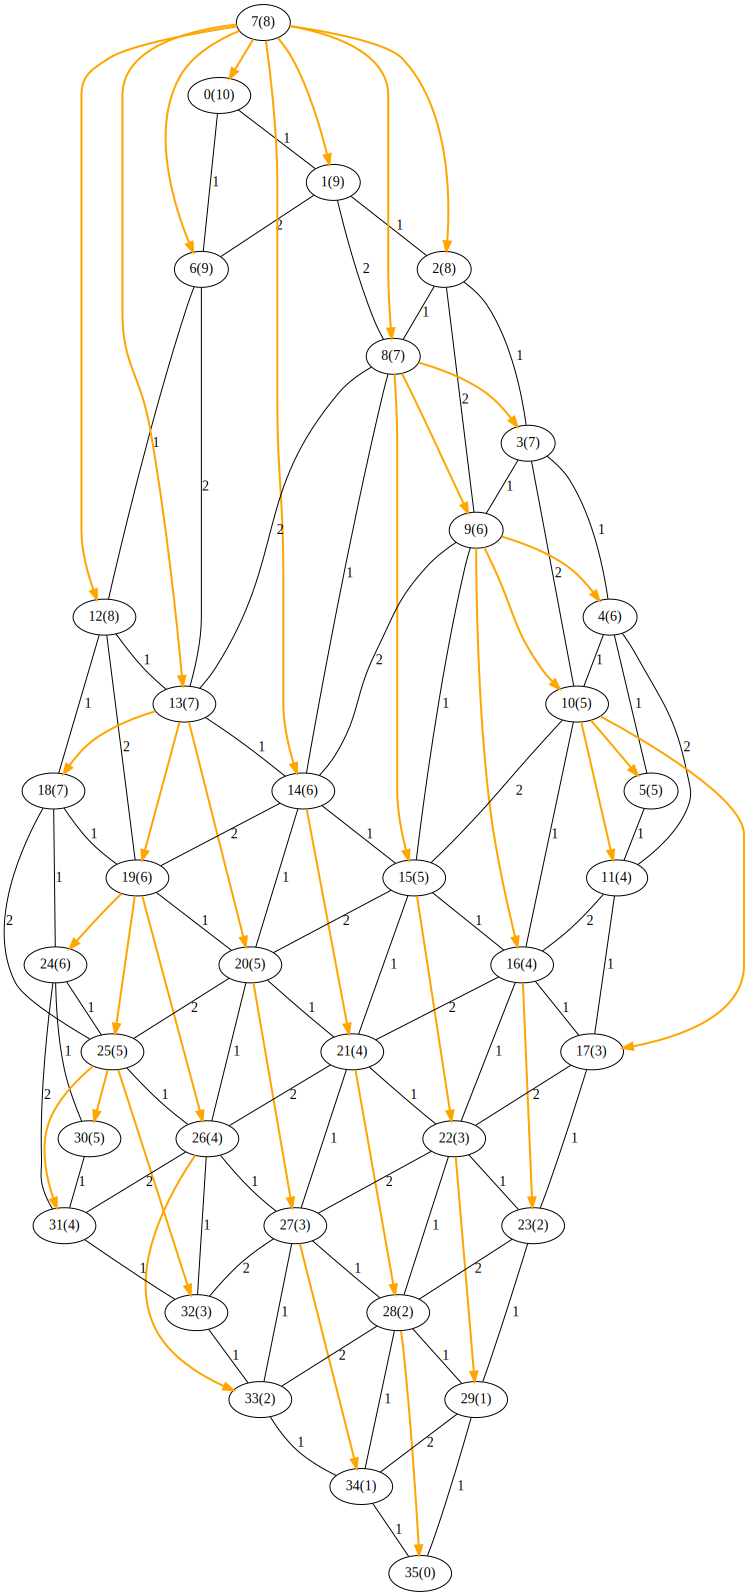

In [36]:
drawGraph(G, path=path, h=h)